In [6]:
# IMPORT REQUIRED LIBRARIES
import numpy as np
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import random
from google.colab import files

In [10]:
from google.colab import auth
auth.authenticate_user()

import gspread
from oauth2client.client import GoogleCredentials

gc = gspread.authorize(GoogleCredentials.get_application_default())

worksheet = gc.open('Untitled spreadsheet').get_worksheet(0)

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()

In [11]:
train = pd.DataFrame.from_records(rows)

In [12]:
worksheet = gc.open('Untitled spreadsheet').get_worksheet(1)

# get_all_values gives a list of rows.
rows = worksheet.get_all_values()
test = pd.DataFrame.from_records(rows)

In [ ]:
# INPUT FUNCTION
def f1(coord):
  x1 = coord[0][0]
  x2 = coord[1][0]
  a = 0
  for p in range(len(train)): #function is in open form
    a = a + float(train.loc[p,1])**2-2*x1*float(train.loc[p,1])-2*float(train.loc[p,1])*x2*float(train.loc[p,0])+x1**2+2*x1*x2*float(train.loc[p,0])+(x2**2)*(float(train.loc[p,0])**2)
  return a

def f1_derivative(coord):
  x1 = coord[0][0]
  x2 = coord[1][0]
  g1 = 0
  g2 = 0
  for p in range(len(train)):
    g1 = g1-2*float(train.loc[p,1])+2*x1+2*x2*float(train.loc[p,0])
    g2 = g2-2*float(train.loc[p,0])*float(train.loc[p,1])+2*x1*float(train.loc[p,0])+2*x2*float(train.loc[p,0])**2
  return np.array([[g1 , g2]])

def f1_hessian(coord):
  x1 = coord[0][0]
  x2 = coord[1][0]
  h1 = 0
  h2 = 0
  h3 = 0
  h4 = 0
  for p in range(len(train)):
    h1 = h1 + 2
    h2 = h2 + 2*float(train.loc[p,0])
    h3 = h3 + 2*float(train.loc[p,0])
    h4 = h4 + 2*float(train.loc[p,0])**2
  return np.array([[h1 , h2],
                   [h3 , h4]])
   

def f2(coord):
  x1 = coord[0][0]
  x2 = coord[1][0]
  x3 = coord[2][0]
  x4 = coord[3][0]
  a = 0
  for p in range(len(train)):
    a = a + (float(train.loc[p,1])-x1-x2*float(train.loc[p,0])-x3*float(train.loc[p,0])**2-x4*float(train.loc[p,0])**3)**2
  return a

def f2_derivative(coord):
  x1 = coord[0][0]
  x2 = coord[1][0]
  x3 = coord[2][0]
  x4 = coord[3][0]
  g1 = 0
  g2 = 0
  g3 = 0
  g4 = 0
  for p in range(len(train)):
    g1 = g1-2*(float(train.loc[p,1])-x1-x2*float(train.loc[p,0])-x3*float(train.loc[p,0])**2-x4*float(train.loc[p,0])**3)
    g2 = g2-2*float(train.loc[p,0])*(float(train.loc[p,1])-x1-x2*float(train.loc[p,0])-x3*float(train.loc[p,0])**2-x4*float(train.loc[p,0])**3)
    g3 = g3-2*(float(train.loc[p,0])**2)*(float(train.loc[p,1])-x1-x2*float(train.loc[p,0])-x3*float(train.loc[p,0])**2-x4*float(train.loc[p,0])**3)
    g4 = g4-2*(float(train.loc[p,0])**3)*(float(train.loc[p,1])-x1-x2*float(train.loc[p,0])-x3*float(train.loc[p,0])**2-x4*float(train.loc[p,0])**3)
  return np.array([[g1 , g2, g3, g4]])

def f2_hessian(coord):
  x1 = coord[0][0]
  x2 = coord[1][0]
  x3 = coord[2][0]
  x4 = coord[3][0]
  h1 = 0
  h2 = 0
  h3 = 0
  h4 = 0
  h5 = 0
  h6 = 0
  h7 = 0
  h8 = 0
  h9 = 0
  h10 = 0
  h11 = 0
  h12 = 0
  h13 = 0
  h14 = 0
  h15 = 0
  h16 = 0    

  for p in range(len(train)): 
     h1 = h1 + 2
     h2 = h2 + 2*float(train.loc[p,0])
     h3 = h3 + 2*float(train.loc[p,0])**2
     h4 = h4 + 2*float(train.loc[p,0])**3
     h5 = h5 + 2*float(train.loc[p,0])
     h6 = h6 + 2*float(train.loc[p,0])**2
     h7 = h7 + 2*float(train.loc[p,0])**3
     h8 = h8 + 2*float(train.loc[p,0])**4
     h9 = h9 + 2*float(train.loc[p,0])**2
     h10 = h10 + 2*float(train.loc[p,0])**3
     h11 = h11 + 2*float(train.loc[p,0])**4
     h12 = h12 + 2*float(train.loc[p,0])**5 
     h13 = h13 + 2*float(train.loc[p,0])**3
     h14 = h14 + 2*float(train.loc[p,0])**4
     h15 = h15 + 2*float(train.loc[p,0])**5
     h16 = h16 + 2*float(train.loc[p,0])**6        
  return np.array([[h1, h2, h3 , h4],
                   [h5, h6, h7 , h8],
                   [h9, h10, h11 , h12],
                   [h13, h14, h15 , h16],])



# BISECTION METHOD
def bisection(a, b, eps, f):
    x = 0 
    x_values = [0]
    if f == 1:
      while abs(b-a) >= eps:
        old_x = x 
        x = (a+b)/2
        x_values.append(x)
        if f(x) >= f(x+eps):
            a = x
        else:
            b = x
        new_x = (a+b)/2
    
    else:
      while abs(b-a) >= eps:
        old_x = x 
        x = (a+b)/2
        x_values.append(x)
        if f(x) >= f(x+eps):
            a = x
        else:
            b = x
        new_x = (a+b)/2
    
    return {
        'x' : x,
        'f(x)' : f(x)
    }

In [ ]:
def bfgs(x0, f, gradient_f, hessian_f, epsilon):
  k = 0
  H = [np.identity(len(x0))]
  x = [x0]
  data = []
   
  while True:
    d = -1 * H[-1].dot(gradient_f(x[-1]).T)
    if np.linalg.norm(d) < eps or k > 1000:
      break
    func = lambda alpha : f(x[-1] + alpha * d)
    alpha = bisection(a=-100, b=100, eps=0.005, f=func)['x']
    new_x = x[-1] + alpha * d
    x.append(new_x)
    p = x[-1] - x[-2]
    q = gradient_f(x[-1]).T - gradient_f(x[-2]).T
    A = (p.T.dot(q) + q.T.dot(H[-1]).dot(q)) * (p.dot(p.T)) / ((p.T.dot(q))**2)
    B = -1 * (H[-1].dot(q).dot(p.T) + p.dot(q.T).dot(H[-1])) / (p.T.dot(q))
    new_H = H[-1] + A + B
    H.append(new_H)
    k += 1

    data.append({
        "k" : k,
        "x" : x[-2],
        "f(x)" : f(x[-2]),
        "d" : d,
        "alpha" : alpha,
        "x_new" : x[-1]
      })
  
  return pd.DataFrame(data)

In [ ]:
pd.options.display.max_colwidth = 100
x0 = np.array([[np.random.uniform(-0.001, 0.001),np.random.uniform(-0.001, 0.001),np.random.uniform(-0.001, 0.001),np.random.uniform(-0.001, 0.001)]]).T
eps = 1E-5
bfgs(x0=x0, f=f2, gradient_f=f2_derivative, hessian_f=f2_hessian, epsilon=eps)


,k,x,f(x),d,alpha,x_new
0,1,"[[0.0008541138460074905], [-0.0006316379365770538], [0.0008159088718176456], [-0.000429831015774...",1.819361e+12,"[[13365521.289675916], [10856955978.105703], [9391546398820.305], [8462111811286692.0]]",-0.003052,"[[-40788.333159789705], [-33132800.226784296], [-28660725094.05529], [-25824315830342.688]]"
1,2,"[[-40788.333159789705], [-33132800.226784296], [-28660725094.05529], [-25824315830342.688]]",6.562051e+45,"[[-0.0], [-150510108672.0], [-0.0], [4.059960429458227e+16]]",-0.003052,"[[-40788.333159789705], [426187599.7732157], [-28660725094.05529], [-149724475420742.7]]"
2,3,"[[-40788.333159789705], [426187599.7732157], [-28660725094.05529], [-149724475420742.7]]",2.205803e+47,"[[2.355423641379799e+17], [8.621945345450967e+19], [2.8636406194813127e+22], [-3.177217958902916...",-0.003052,"[[-718818249973588.4], [-2.631208902430924e+17], [-8.739137635560509e+19], [9.681127280555206e+16]]"
3,4,"[[-718818249973588.4], [-2.631208902430924e+17], [-8.739137635560509e+19], [9.681127280555206e+16]]",3.815630e+51,"[[946610792038400.0], [2.916080758722396e+17], [8.734516646456905e+19], [-1.5609201925554176e+16]]",0.051880,"[[-669708193013588.4], [-2.47992297439662e+17], [-8.285991935518494e+19], [9.600146923885766e+16]]"
4,5,"[[-669708193013588.4], [-2.47992297439662e+17], [-8.285991935518494e+19], [9.600146923885766e+16]]",3.592799e+51,"[[-1.6022464283291943e+19], [-1.9842274754125638e+21], [2.563592367683943e+21], [-2.980829374011...",0.027466,"[[-4.4073983316135917e+17], [-5.474642759624665e+19], [-1.2448752029881336e+19], [1.413054527003..."
5,6,"[[-4.4073983316135917e+17], [-5.474642759624665e+19], [-1.2448752029881336e+19], [1.413054527003...",8.009191e+49,"[[6.296430950686268e+23], [7.81752069456996e+25], [-2.3529464452828908e+23], [1.6085268131235444...",-0.003052,"[[-1.9219589742955235e+21], [-2.3862654496793925e+23], [7.056135176487352e+20], [-4.767528815865..."
6,7,"[[-1.9219589742955235e+21], [-2.3862654496793925e+23], [7.056135176487352e+20], [-4.767528815865...",3.476183e+52,"[[1.9219566206295747e+21], [2.3862625349086263e+23], [-7.052820569641504e+20], [4.76378994683162...",0.997925,"[[-3.9907890359076127e+18], [-4.954875597603031e+20], [1.7950587031871816e+18], [-13624663600892..."
7,8,"[[-3.9907890359076127e+18], [-4.954875597603031e+20], [1.7950587031871816e+18], [-13624663600892...",1.957896e+47,"[[3.9939665219226173e+18], [4.958817247874966e+20], [-1.8048671418803692e+18], [1373013235995110...",0.991821,"[[-2.948801166185267e+16], [-3.6615082590324e+18], [4953047940843776.0], [-682602464735.5]]"
8,9,"[[-2.948801166185267e+16], [-3.6615082590324e+18], [4953047940843776.0], [-682602464735.5]]",2.672024e+43,"[[2.996848282094797e+16], [3.722327536808624e+18], [-5019151439286784.0], [675683330355.0]]",0.979614,"[[-130458605443072.0], [-1.5063131726588416e+16], [36215628798312.0], [-20693440553.508423]]"
9,10,"[[-130458605443072.0], [-1.5063131726588416e+16], [36215628798312.0], [-20693440553.508423]]",1.802184e+38,"[[163310803943424.0], [1.5063390142920192e+16], [-36217057650546.0], [20694650369.124023]]",0.997925,"[[32513296685528.0], [-31001060283170.0], [73728616034.95312], [-41735625.824230194]]"


In [ ]:
x0 = np.array([[np.random.uniform(-0.001, 0.001),np.random.uniform(-0.001, 0.001)]]).T
eps = 1E-5
bfgs(x0=x0, f=f1, gradient_f=f1_derivative, hessian_f=f1_hessian, epsilon=eps)

,k,x,f(x),d,alpha,x_new
0,1,"[[0.00012842480669478782], [-0.0005282995214916529]]",2.306296e+07,"[[77729.56748349387], [39998714.66353347]]",-0.003052,"[[-237.2116864051917], [-122066.39049269611]]"
1,2,"[[-237.2116864051917], [-122066.39049269611]]",3.174340e+17,"[[8233.460743630183], [122053.39051140878]]",0.997925,"[[7979.1630180841585], [-266.2846051513334]]"
2,3,"[[7979.1630180841585], [-266.2846051513334]]",1.369169e+12,"[[-555723.7540807067], [1222.2138249761895]]",0.119019,"[[-58162.27499811324], [-120.81848218358621]]"
3,4,"[[-58162.27499811324], [-120.81848218358621]]",1.180602e+12,"[[532223.8573115527], [1015.3270712740167]]",0.112915,"[[1933.8026402151663], [-6.172786269466897]]"
4,5,"[[1933.8026402151663], [-6.172786269466897]]",4.185796e+08,"[[-1820.4492530934288], [6.913452612264476]]",0.997925,"[[117.13117487840123], [0.7263195783434169]]"
5,6,"[[117.13117487840123], [0.7263195783434169]]",3.836201e+06,"[[-3.7076159997914253], [0.014192626932883848]]",0.997925,"[[113.43125290595312], [0.7404827528034176]]"
6,7,"[[113.43125290595312], [0.7404827528034176]]",3.834444e+06,"[[-0.007694450226597226], [2.9452869510578215e-05]]",0.997925,"[[113.42357442321357], [0.7405121445524714]]"
7,8,"[[113.42357442321357], [0.7405121445524714]]",3.834444e+06,"[[-1.5967482644302564e-05], [6.112045269140077e-08]]",4.116821,"[[113.42350868794108], [0.7405123961744522]]"
8,9,"[[113.42350868794108], [0.7405123961744522]]",3.834444e+06,"[[4.976778982875005e-05], [-1.905015280854266e-07]]",-0.149536,"[[113.42350124585825], [0.740512424661314]]"
9,10,"[[113.42350124585825], [0.740512424661314]]",3.834444e+06,"[[5.720987345245731e-05], [-2.1898839112979143e-07]]",1.412964,"[[113.42358208134229], [0.7405121152386299]]"


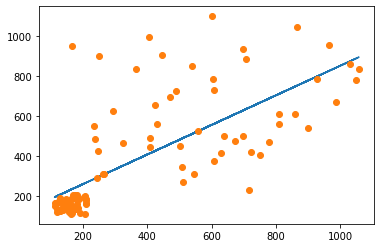

In [ ]:
import matplotlib.pyplot as plt
plt.plot( pd.to_numeric(train[0]),(113.42301376648884 + 0.7405144495739371*pd.to_numeric(train[0])))
plt.plot( pd.to_numeric(train[0]),pd.to_numeric(train[1]), 'o')

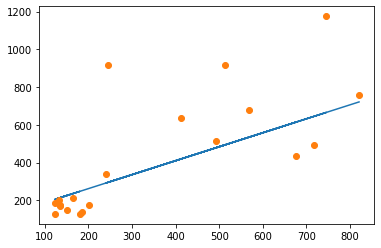

In [ ]:
import matplotlib.pyplot as plt
plt.plot( pd.to_numeric(test[0]),(113.42301376648884 + 0.7405144495739371*pd.to_numeric(test[0])))
plt.plot( pd.to_numeric(test[0]),pd.to_numeric(test[1]), 'o')

In [ ]:
data = []
sse = sum((pd.to_numeric(train[1]) - (113.42301376648884 + 0.7405144495739371*pd.to_numeric(train[0])))**2)
mse = mean((pd.to_numeric(test[1]) - (113.42301376648884 + 0.7405144495739371*pd.to_numeric(test[0])))**2)
k = 0

for p in range(len(test)):
  k = k + (mse - (float(test.loc[p,1]) - (113.42301376648884 + 0.7405144495739371*float(test.loc[p,0]))**2))**2
k= k/(len(test)-1)


data.append({
      "SSE" : sse,
      "Test MSE" : mse,
      "S2 for Test MSE" : k

    })


In [ ]:
data

[{'S2 for Test MSE': 75337690276.60031,
  'SSE': 3834444.148888797,
  'Test MSE': 50191.32660154645}]

In [ ]:
[[-379.8603148781845], [4.740908596871723], [-0.007537299456772834], [3.957024782783708e-06]]

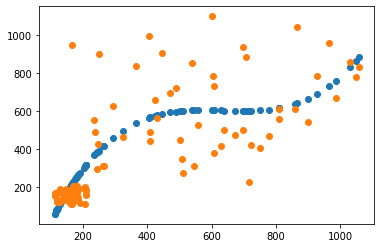

In [ ]:
import matplotlib.pyplot as plt
plt.plot( pd.to_numeric(train[0]),(-379.8603148781845 + 4.740908596871723*pd.to_numeric(train[0]) 
+ -0.007537299456772834*pd.to_numeric(train[0])**2+ 3.957024782783708e-06*pd.to_numeric(train[0])**3 ), 'o')
plt.plot( pd.to_numeric(train[0]),pd.to_numeric(train[1]), 'o')

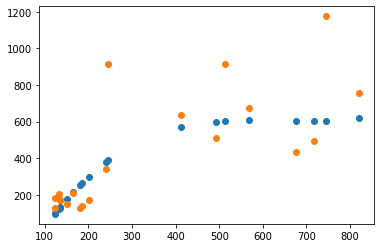

In [ ]:
import matplotlib.pyplot as plt
plt.plot( pd.to_numeric(test[0]),(-379.8603148781845 + 4.740908596871723*pd.to_numeric(test[0]) 
+ -0.007537299456772834*pd.to_numeric(test[0])**2+ 3.957024782783708e-06*pd.to_numeric(test[0])**3 ), 'o')
plt.plot( pd.to_numeric(test[0]),pd.to_numeric(test[1]), 'o')

In [ ]:
data = []
sse = sum((pd.to_numeric(train[1]) - (-379.8603148781845 + 4.740908596871723*pd.to_numeric(train[0]) + -0.007537299456772834*pd.to_numeric(train[0])**2+ 3.957024782783708e-06*pd.to_numeric(train[0])**3 ))**2)
mse = mean((pd.to_numeric(test[1]) - (-379.8603148781845 + 4.740908596871723*pd.to_numeric(test[0]) + -0.007537299456772834*pd.to_numeric(test[0])**2+ 3.957024782783708e-06*pd.to_numeric(test[0])**3 ))**2)
k = 0

for p in range(len(test)):
  k = k + (mse - (float(test.loc[p,1]) - (-379.8603148781845 + 4.740908596871723*float(test.loc[p,0]) + -0.007537299456772834*float(test.loc[p,0])**2+ 3.957024782783708e-06*float(test.loc[p,0])**3)**2))**2
k= k/(len(test)-1)


data.append({
      "SSE" : sse,
      "Test MSE" : mse,
      "S2 for Test MSE" : k

    })

In [ ]:
data 

[{'S2 for Test MSE': 76102997743.76323,
  'SSE': 3145318.304039767,
  'Test MSE': 42217.66068362533}]

In [ ]:
# SECOND QUESTION

In [7]:
def sig(z):
  if z<0:
    return np.exp(z)/(1.0+np.exp(z))

  else:
    return 1.0/(1.0 + np.exp(-z))


def sig_dif(x):

  a = sig(x)*(1.0-sig(x))
  return a

In [46]:
def f1_test(i): #returns f1 test preds
  x = pd.DataFrame({ 0 : np.repeat(1.0,len(train[0])), 1 : ((pd.to_numeric(train[0])-pd.to_numeric(train[0]).mean())/pd.to_numeric(train[0]).std())})
  #train[1] = ((pd.to_numeric(train[1])-pd.to_numeric(train[1]).mean())/pd.to_numeric(train[1]).std())
  
  x_test = pd.DataFrame({ 0 : np.repeat(1.0,len(test[0])), 1 : ((pd.to_numeric(test[0])-pd.to_numeric(test[0]).mean())/pd.to_numeric(test[0]).std())})
  
  ytrain = (pd.to_numeric(train[1]) - pd.to_numeric(train[1]).mean())/pd.to_numeric(train[1]).std()
 # x = pd.DataFrame({ 0 : np.repeat(1.0,len(train[0])), 1 :pd.to_numeric(train[0]), 2 :pd.to_numeric(train[0])**2, 3 :pd.to_numeric(train[0])**3})
  #x_test = pd.DataFrame({ 0 : np.repeat(1.0,len(test[0])), 1 :pd.to_numeric(test[0]), 2 :pd.to_numeric(test[0])**2, 3 :pd.to_numeric(test[0])**3})

  P = len(train)
  t = 0
  epsilon= 0.001
  n = 0.9
  alpha = 0.5
  J = i
  K = 1
  wjk = np.random.uniform(-0.001, 0.001,size=(J,K+1))
  #np.random.uniform(-0.001, 0.001,size=(J,K+1))
  Wij = np.random.uniform(-0.001, 0.001,size=(1,J+1))
  #np.random.uniform(-0.001, 0.001,size=(1,J+1))
  hjp = np.zeros(shape=(J,P))
  Hjp = np.zeros(shape=(J,P))
  Hjp = np.insert(Hjp, 0, np.repeat(1.0,P), axis=0)
  op = np.zeros(shape = (1,P))
  d_ip = np.zeros(shape = (1,P))
  d_jp = np.zeros(shape=(J,P))
  delta_Wij = np.zeros(shape=(1,J+1))
  delta_wjk = np.zeros(shape=(J,K+1))
  while alpha > epsilon:
    #x = x.sample(frac=1).reset_index(drop=True)
    for p in range(P):
      for j in range(J):
        hjp[j,p] =   np.dot(x.loc[p],wjk[j].transpose())
        Hjp[j+1,p] = sig(hjp[j,p])
      op[0,p] = np.dot(Wij[0],Hjp.transpose()[p])
      d_ip[0,p] = (ytrain[p])-op[0,p]  #

      for j in range(J):
        d_jp[j,p] = sig_dif(hjp[j,p])*(d_ip[0,p]*Wij[0,j+1])   #

      for j in range(J+1):
        #delta_Wij[0,j] = alpha * float(d_ip[0,p]*Hjp[j,p])
        Wij[0,j] = Wij[0,j] + alpha * d_ip[0,p]*Hjp[j,p]

      for j in range(J):
        for k in range(K+1):
          #delta_wjk[j,k] = alpha * float(x.loc[p,k]*d_jp[j,p])
          wjk[j,k] = wjk[j,k] + alpha * x.loc[p,k]*d_jp[j,p]

    alpha = alpha * n
    t = t + 1
  

  unit = np.zeros(shape=(J,P))
  a = []

  P_new = len(x_test)

  for p in range(P_new):
    for j in range(J):
      unit[j,p]= unit[j,p] + sig(np.dot(x_test.loc[p],wjk[j]))

  for p in range(P_new):
    a.append(float(np.dot(np.insert(unit[:,p], 0, 1.0),Wij[0].transpose())))
  return a

In [23]:
ytest = (pd.to_numeric(test[1]) - pd.to_numeric(test[1]).mean())/pd.to_numeric(test[1]).std()
for i in range(3,20):
  print('Number of hidden unit is: ', i)
  print('Average test error is: ',np.mean(ytest-f1(i)))
  print('Average test sd is: ',(ytest-f1(i)).std())

Number of hidden unit is:  3
Average test error is:  -0.010809980820674752
Average test sd is:  0.6244569112019861
Number of hidden unit is:  4
Average test error is:  -0.011792697440465672
Average test sd is:  0.6262228455323915
Number of hidden unit is:  5
Average test error is:  -0.012552481916301012
Average test sd is:  0.6276493577932032
Number of hidden unit is:  6
Average test error is:  -0.0131397970796789
Average test sd is:  0.628809801123761
Number of hidden unit is:  7
Average test error is:  -0.013588477149004158
Average test sd is:  0.6297471578388271
Number of hidden unit is:  8
Average test error is:  -0.013927517944861028
Average test sd is:  0.630497382989461
Number of hidden unit is:  9
Average test error is:  -0.014181914705443865
Average test sd is:  0.6310953661423524
Number of hidden unit is:  10
Average test error is:  -0.01437251766973699
Average test sd is:  0.6315787333287107
Number of hidden unit is:  11
Average test error is:  -0.014519668496436416


KeyboardInterrupt: ignored

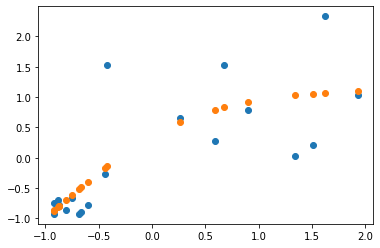

In [37]:
x_test = pd.DataFrame({ 0 : np.repeat(1.0,len(test[0])), 1 : ((pd.to_numeric(test[0])-pd.to_numeric(test[0]).mean())/pd.to_numeric(test[0]).std())})

import matplotlib.pyplot as plt
plt.plot(x_test[1], ytest, 'o')
plt.plot(x_test[1], f1(3), 'o')

In [49]:
# Online learning no index for output unit since there is only one

def f1_train(i):
  x = pd.DataFrame({ 0 : np.repeat(1.0,len(train[0])), 1 : ((pd.to_numeric(train[0])-pd.to_numeric(train[0]).mean())/pd.to_numeric(train[0]).std())})
  #train[1] = ((pd.to_numeric(train[1])-pd.to_numeric(train[1]).mean())/pd.to_numeric(train[1]).std())
  
  x_test = pd.DataFrame({ 0 : np.repeat(1.0,len(test[0])), 1 : ((pd.to_numeric(test[0])-pd.to_numeric(test[0]).mean())/pd.to_numeric(test[0]).std())})
  
  ytrain = (pd.to_numeric(train[1]) - pd.to_numeric(train[1]).mean())/pd.to_numeric(train[1]).std()
 # x = pd.DataFrame({ 0 : np.repeat(1.0,len(train[0])), 1 :pd.to_numeric(train[0]), 2 :pd.to_numeric(train[0])**2, 3 :pd.to_numeric(train[0])**3})
  #x_test = pd.DataFrame({ 0 : np.repeat(1.0,len(test[0])), 1 :pd.to_numeric(test[0]), 2 :pd.to_numeric(test[0])**2, 3 :pd.to_numeric(test[0])**3})

  P = len(train)
  t = 0
  epsilon= 0.001
  n = 0.9
  alpha = 0.5
  J = i
  K = 1
  wjk = np.random.uniform(-0.001, 0.001,size=(J,K+1))
  #np.random.uniform(-0.001, 0.001,size=(J,K+1))
  Wij = np.random.uniform(-0.001, 0.001,size=(1,J+1))
  #np.random.uniform(-0.001, 0.001,size=(1,J+1))
  hjp = np.zeros(shape=(J,P))
  Hjp = np.zeros(shape=(J,P))
  Hjp = np.insert(Hjp, 0, np.repeat(1.0,P), axis=0)
  op = np.zeros(shape = (1,P))
  d_ip = np.zeros(shape = (1,P))
  d_jp = np.zeros(shape=(J,P))
  delta_Wij = np.zeros(shape=(1,J+1))
  delta_wjk = np.zeros(shape=(J,K+1))
  while alpha > epsilon:
    #x = x.sample(frac=1).reset_index(drop=True)
    for p in range(P):
      for j in range(J):
        hjp[j,p] =   np.dot(x.loc[p],wjk[j].transpose())
        Hjp[j+1,p] = sig(hjp[j,p])
      op[0,p] = np.dot(Wij[0],Hjp.transpose()[p])
      d_ip[0,p] = (ytrain[p])-op[0,p]  #

      for j in range(J):
        d_jp[j,p] = sig_dif(hjp[j,p])*(d_ip[0,p]*Wij[0,j+1])   #

      for j in range(J+1):
        #delta_Wij[0,j] = alpha * float(d_ip[0,p]*Hjp[j,p])
        Wij[0,j] = Wij[0,j] + alpha * d_ip[0,p]*Hjp[j,p]

      for j in range(J):
        for k in range(K+1):
          #delta_wjk[j,k] = alpha * float(x.loc[p,k]*d_jp[j,p])
          wjk[j,k] = wjk[j,k] + alpha * x.loc[p,k]*d_jp[j,p]

    alpha = alpha * n
    t = t + 1
  
  #FITTING

  unit = np.zeros(shape=(J,P))
  a = []

  P_new = len(x)

  for p in range(P_new):
    for j in range(J):
      unit[j,p]= unit[j,p] + sig(np.dot(x.loc[p],wjk[j]))

  for p in range(P_new):
    a.append(float(np.dot(np.insert(unit[:,p], 0, 1.0),Wij[0].transpose())))
  return a

In [43]:
ytest = (pd.to_numeric(test[1]) - pd.to_numeric(test[1]).mean())/pd.to_numeric(test[1]).std()
for i in range(3,7):
  print('Number of hidden unit is: ', i)
  print('Average test error is: ',np.mean(ytest-f2(i)))
  print('Average test sd is: ',(ytest-f2(i)).std())

Number of hidden unit is:  3
Average test error is:  0.002897486282278633
Average test sd is:  0.6266630925956373
Number of hidden unit is:  4
Average test error is:  -0.00022609984093218126
Average test sd is:  0.6288892703701915
Number of hidden unit is:  5
Average test error is:  -0.0022153472240690696
Average test sd is:  0.6307414442562229
Number of hidden unit is:  6
Average test error is:  -0.003351944532913609
Average test sd is:  0.632290280354848


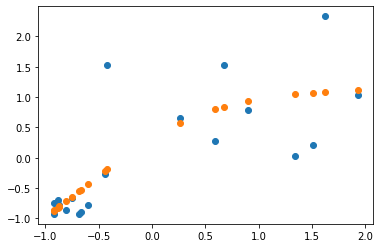

In [19]:
x_test = pd.DataFrame({ 0 : np.repeat(1.0,len(test[0])), 1 : ((pd.to_numeric(test[0])-pd.to_numeric(test[0]).mean())/pd.to_numeric(test[0]).std()),
                    2 : ((pd.to_numeric(test[0])**2-(pd.to_numeric(test[0])**2).mean())/(pd.to_numeric(test[0])**2).std()), 3 :((pd.to_numeric(test[0])**3-(pd.to_numeric(test[0])**3).mean())/(pd.to_numeric(test[0])**3).std())})
  

import matplotlib.pyplot as plt
plt.plot(x_test[1], ytest, 'o')
plt.plot(x_test[1], f2(4), 'o')

In [51]:
# Online learning no index for output unit since there is only one

def f2_test(i): # Returns test pred
  x = pd.DataFrame({ 0 : np.repeat(1.0,len(train[0])), 1 : ((pd.to_numeric(train[0])-pd.to_numeric(train[0]).mean())/pd.to_numeric(train[0]).std()),
                    2 : ((pd.to_numeric(train[0])**2-(pd.to_numeric(train[0])**2).mean())/(pd.to_numeric(train[0])**2).std()), 3 :((pd.to_numeric(train[0])**3-(pd.to_numeric(train[0])**3).mean())/(pd.to_numeric(train[0])**3).std())})
  #train[1] = ((pd.to_numeric(train[1])-pd.to_numeric(train[1]).mean())/pd.to_numeric(train[1]).std())
  
  x_test = pd.DataFrame({ 0 : np.repeat(1.0,len(test[0])), 1 : ((pd.to_numeric(test[0])-pd.to_numeric(test[0]).mean())/pd.to_numeric(test[0]).std()),
                    2 : ((pd.to_numeric(test[0])**2-(pd.to_numeric(test[0])**2).mean())/(pd.to_numeric(test[0])**2).std()), 3 :((pd.to_numeric(test[0])**3-(pd.to_numeric(test[0])**3).mean())/(pd.to_numeric(test[0])**3).std())})
  
  ytrain = (pd.to_numeric(train[1]) - pd.to_numeric(train[1]).mean())/pd.to_numeric(train[1]).std()
 # x = pd.DataFrame({ 0 : np.repeat(1.0,len(train[0])), 1 :pd.to_numeric(train[0]), 2 :pd.to_numeric(train[0])**2, 3 :pd.to_numeric(train[0])**3})
  #x_test = pd.DataFrame({ 0 : np.repeat(1.0,len(test[0])), 1 :pd.to_numeric(test[0]), 2 :pd.to_numeric(test[0])**2, 3 :pd.to_numeric(test[0])**3})

  P = len(train)
  t = 0
  epsilon= 0.001
  n = 0.9
  alpha = 0.5
  J = i
  K = 3
  wjk = np.random.uniform(-0.001, 0.001,size=(J,K+1))
  #np.random.uniform(-0.001, 0.001,size=(J,K+1))
  Wij = np.random.uniform(-0.001, 0.001,size=(1,J+1))
  #np.random.uniform(-0.001, 0.001,size=(1,J+1))
  hjp = np.zeros(shape=(J,P))
  Hjp = np.zeros(shape=(J,P))
  Hjp = np.insert(Hjp, 0, np.repeat(1.0,P), axis=0)
  op = np.zeros(shape = (1,P))
  d_ip = np.zeros(shape = (1,P))
  d_jp = np.zeros(shape=(J,P))
  delta_Wij = np.zeros(shape=(1,J+1))
  delta_wjk = np.zeros(shape=(J,K+1))
  while alpha > epsilon:
    #x = x.sample(frac=1).reset_index(drop=True)
    for p in range(P):
      for j in range(J):
        hjp[j,p] =   np.dot(x.loc[p],wjk[j].transpose())
        Hjp[j+1,p] = sig(hjp[j,p])
      op[0,p] = np.dot(Wij[0],Hjp.transpose()[p])
      d_ip[0,p] = (ytrain[p])-op[0,p]  #

      for j in range(J):
        d_jp[j,p] = sig_dif(hjp[j,p])*(d_ip[0,p]*Wij[0,j+1])   #

      for j in range(J+1):
        #delta_Wij[0,j] = alpha * float(d_ip[0,p]*Hjp[j,p])
        Wij[0,j] = Wij[0,j] + alpha * d_ip[0,p]*Hjp[j,p]

      for j in range(J):
        for k in range(K+1):
          #delta_wjk[j,k] = alpha * float(x.loc[p,k]*d_jp[j,p])
          wjk[j,k] = wjk[j,k] + alpha * x.loc[p,k]*d_jp[j,p]

    alpha = alpha * n
    t = t + 1
  
  #FITTING

  unit = np.zeros(shape=(J,P))
  a = []

  P_new = len(x_test)

  for p in range(P_new):
    for j in range(J):
      unit[j,p]= unit[j,p] + sig(np.dot(x_test.loc[p],wjk[j]))

  for p in range(P_new):
    a.append(float(np.dot(np.insert(unit[:,p], 0, 1.0),Wij[0].transpose())))
  return a

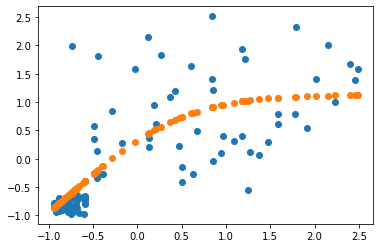

In [30]:
# TRAINING PLOTS

x = pd.DataFrame({ 0 : np.repeat(1.0,len(train[0])), 1 : ((pd.to_numeric(train[0])-pd.to_numeric(train[0]).mean())/pd.to_numeric(train[0]).std()),
                    2 : ((pd.to_numeric(train[0])**2-(pd.to_numeric(train[0])**2).mean())/(pd.to_numeric(train[0])**2).std()), 3 :((pd.to_numeric(train[0])**3-(pd.to_numeric(train[0])**3).mean())/(pd.to_numeric(train[0])**3).std())})
ytrain = (pd.to_numeric(train[1]) - pd.to_numeric(train[1]).mean())/pd.to_numeric(train[1]).std()

import matplotlib.pyplot as plt
plt.plot(x[1], ytrain, 'o')
plt.plot(x[1], f2(4), 'o')

In [53]:
def f2_train(i): # Returns train pred
  x = pd.DataFrame({ 0 : np.repeat(1.0,len(train[0])), 1 : ((pd.to_numeric(train[0])-pd.to_numeric(train[0]).mean())/pd.to_numeric(train[0]).std()),
                    2 : ((pd.to_numeric(train[0])**2-(pd.to_numeric(train[0])**2).mean())/(pd.to_numeric(train[0])**2).std()), 3 :((pd.to_numeric(train[0])**3-(pd.to_numeric(train[0])**3).mean())/(pd.to_numeric(train[0])**3).std())})
  #train[1] = ((pd.to_numeric(train[1])-pd.to_numeric(train[1]).mean())/pd.to_numeric(train[1]).std())
  
  x_test = pd.DataFrame({ 0 : np.repeat(1.0,len(test[0])), 1 : ((pd.to_numeric(test[0])-pd.to_numeric(test[0]).mean())/pd.to_numeric(test[0]).std())})
  
  ytrain = (pd.to_numeric(train[1]) - pd.to_numeric(train[1]).mean())/pd.to_numeric(train[1]).std()
  # x = pd.DataFrame({ 0 : np.repeat(1.0,len(train[0])), 1 :pd.to_numeric(train[0]), 2 :pd.to_numeric(train[0])**2, 3 :pd.to_numeric(train[0])**3})
  #x_test = pd.DataFrame({ 0 : np.repeat(1.0,len(test[0])), 1 :pd.to_numeric(test[0]), 2 :pd.to_numeric(test[0])**2, 3 :pd.to_numeric(test[0])**3})

  P = len(train)
  t = 0
  epsilon= 0.001
  n = 0.9
  alpha = 0.5
  J = i
  K = 3
  wjk = np.random.uniform(-0.001, 0.001,size=(J,K+1))
  #np.random.uniform(-0.001, 0.001,size=(J,K+1))
  Wij = np.random.uniform(-0.001, 0.001,size=(1,J+1))
  #np.random.uniform(-0.001, 0.001,size=(1,J+1))
  hjp = np.zeros(shape=(J,P))
  Hjp = np.zeros(shape=(J,P))
  Hjp = np.insert(Hjp, 0, np.repeat(1.0,P), axis=0)
  op = np.zeros(shape = (1,P))
  d_ip = np.zeros(shape = (1,P))
  d_jp = np.zeros(shape=(J,P))
  delta_Wij = np.zeros(shape=(1,J+1))
  delta_wjk = np.zeros(shape=(J,K+1))
  while alpha > epsilon:
    #x = x.sample(frac=1).reset_index(drop=True)
    for p in range(P):
      for j in range(J):
        hjp[j,p] =   np.dot(x.loc[p],wjk[j].transpose())
        Hjp[j+1,p] = sig(hjp[j,p])
      op[0,p] = np.dot(Wij[0],Hjp.transpose()[p])
      d_ip[0,p] = (ytrain[p])-op[0,p]  #

      for j in range(J):
        d_jp[j,p] = sig_dif(hjp[j,p])*(d_ip[0,p]*Wij[0,j+1])   #

      for j in range(J+1):
        #delta_Wij[0,j] = alpha * float(d_ip[0,p]*Hjp[j,p])
        Wij[0,j] = Wij[0,j] + alpha * d_ip[0,p]*Hjp[j,p]

      for j in range(J):
        for k in range(K+1):
          #delta_wjk[j,k] = alpha * float(x.loc[p,k]*d_jp[j,p])
          wjk[j,k] = wjk[j,k] + alpha * x.loc[p,k]*d_jp[j,p]

    alpha = alpha * n
    t = t + 1
  

  unit = np.zeros(shape=(J,P))
  a = []

  P_new = len(x)

  for p in range(P_new):
    for j in range(J):
      unit[j,p]= unit[j,p] + sig(np.dot(x.loc[p],wjk[j]))

  for p in range(P_new):
    a.append(float(np.dot(np.insert(unit[:,p], 0, 1.0),Wij[0].transpose())))
  return a

In [61]:
def f2_train(i): # Returns train pred
  x = pd.DataFrame({ 0 : np.repeat(1.0,len(train[0])), 1 : ((pd.to_numeric(train[0])-pd.to_numeric(train[0]).mean())/pd.to_numeric(train[0]).std()),
                    2 : ((pd.to_numeric(train[0])**2-(pd.to_numeric(train[0])**2).mean())/(pd.to_numeric(train[0])**2).std()), 3 :((pd.to_numeric(train[0])**3-(pd.to_numeric(train[0])**3).mean())/(pd.to_numeric(train[0])**3).std())})
  #train[1] = ((pd.to_numeric(train[1])-pd.to_numeric(train[1]).mean())/pd.to_numeric(train[1]).std())
  
  x_test = pd.DataFrame({ 0 : np.repeat(1.0,len(test[0])), 1 : ((pd.to_numeric(test[0])-pd.to_numeric(test[0]).mean())/pd.to_numeric(test[0]).std())})
  
  ytrain = (pd.to_numeric(train[1]) - pd.to_numeric(train[1]).mean())/pd.to_numeric(train[1]).std()
  # x = pd.DataFrame({ 0 : np.repeat(1.0,len(train[0])), 1 :pd.to_numeric(train[0]), 2 :pd.to_numeric(train[0])**2, 3 :pd.to_numeric(train[0])**3})
  #x_test = pd.DataFrame({ 0 : np.repeat(1.0,len(test[0])), 1 :pd.to_numeric(test[0]), 2 :pd.to_numeric(test[0])**2, 3 :pd.to_numeric(test[0])**3})

  P = len(train)
  t = 0
  epsilon= 0.001
  n = 0.9
  alpha = 0.5
  J = i
  K = 3
  wjk = np.random.uniform(-0.001, 0.001,size=(J,K+1))
  #np.random.uniform(-0.001, 0.001,size=(J,K+1))
  Wij = np.random.uniform(-0.001, 0.001,size=(1,J+1))
  #np.random.uniform(-0.001, 0.001,size=(1,J+1))
  hjp = np.zeros(shape=(J,P))
  Hjp = np.zeros(shape=(J,P))
  Hjp = np.insert(Hjp, 0, np.repeat(1.0,P), axis=0)
  op = np.zeros(shape = (1,P))
  d_ip = np.zeros(shape = (1,P))
  d_jp = np.zeros(shape=(J,P))
  delta_Wij = np.zeros(shape=(1,J+1))
  delta_wjk = np.zeros(shape=(J,K+1))
  while alpha > epsilon:
    #x = x.sample(frac=1).reset_index(drop=True)
    for p in range(P):
      for j in range(J):
        hjp[j,p] =   np.dot(x.loc[p],wjk[j].transpose())
        Hjp[j+1,p] = sig(hjp[j,p])
      op[0,p] = np.dot(Wij[0],Hjp.transpose()[p])
      d_ip[0,p] = (ytrain[p])-op[0,p]  #

      for j in range(J):
        d_jp[j,p] = sig_dif(hjp[j,p])*(d_ip[0,p]*Wij[0,j+1])   #

      for j in range(J+1):
        #delta_Wij[0,j] = alpha * float(d_ip[0,p]*Hjp[j,p])
        Wij[0,j] = Wij[0,j] + alpha * d_ip[0,p]*Hjp[j,p]

      for j in range(J):
        for k in range(K+1):
          #delta_wjk[j,k] = alpha * float(x.loc[p,k]*d_jp[j,p])
          wjk[j,k] = wjk[j,k] + alpha * x.loc[p,k]*d_jp[j,p]

    alpha = alpha * n
    t = t + 1
  

  unit = np.zeros(shape=(J,P))
  a = []

  P_new = len(x)

  for p in range(P_new):
    for j in range(J):
      unit[j,p]= unit[j,p] + sig(np.dot(x.loc[p],wjk[j]))

  for p in range(P_new):
    a.append(float(np.dot(np.insert(unit[:,p], 0, 1.0),Wij[0].transpose())))
  return a

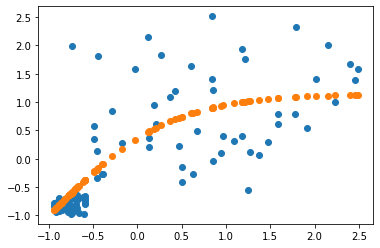

In [34]:
# TRAINING PLOTS

x = pd.DataFrame({ 0 : np.repeat(1.0,len(train[0])), 1 : ((pd.to_numeric(train[0])-pd.to_numeric(train[0]).mean())/pd.to_numeric(train[0]).std())})
              
ytrain = (pd.to_numeric(train[1]) - pd.to_numeric(train[1]).mean())/pd.to_numeric(train[1]).std()

import matplotlib.pyplot as plt
plt.plot(x[1], ytrain, 'o')
plt.plot(x[1], f1(3), 'o')

In [54]:
f1_test(3)

[-0.6153417149366212,
 -0.8041612916803199,
 -0.7945895331383185,
 -0.5195627623626683,
 -0.8179382103507188,
 -0.8743751367352751,
 -0.697255872408102,
 -0.8625575261076164,
 -0.491067006533794,
 -0.39525669776458855,
 1.0711667553318518,
 0.9209585748926548,
 0.7901200348915284,
 1.0300437012890846,
 -0.13274697229442212,
 0.8311524235838716,
 0.5844927964698688,
 -0.16325670931877165,
 1.056988383563513,
 1.0993755409996318]

In [67]:
ytest[1]

-0.7877844905979199

In [68]:

ytrain = (pd.to_numeric(train[1])-pd.to_numeric(train[1]).mean())/pd.to_numeric(train[1]).std()
ytest = (pd.to_numeric(test[1])-pd.to_numeric(test[1]).mean())/pd.to_numeric(test[1]).std()


data = []
sse = sum((ytrain-f1_train(3))**2)
mse = mean((ytest - f1_test(3))**2)
k = 0

for p in range(len(ytest)):
  k = k + (mse - (ytest[p] - f1_test(3)[p])**2)**2
k= k/(len(ytest)-1)

#f1 
data.append({
      "SSE" : sse,
      "Test MSE" : mse,
      "S2 for Test MSE" : k

    })

In [69]:
data

[{'S2 for Test MSE': 0.4901452378683963,
  'SSE': 41.849575007478954,
  'Test MSE': 0.3705660898090262}]

In [70]:

ytrain = (pd.to_numeric(train[1])-pd.to_numeric(train[1]).mean())/pd.to_numeric(train[1]).std()
ytest = (pd.to_numeric(test[1])-pd.to_numeric(test[1]).mean())/pd.to_numeric(test[1]).std()


data = []
sse = sum((ytrain-f2_train(4))**2)
mse = mean((ytest - f2_test(4))**2)
k = 0

for p in range(len(ytest)):
  k = k + (mse - (ytest[p] - f2_test(4)[p])**2)**2
k= k/(len(ytest)-1)

#f1 
data.append({
      "SSE" : sse,
      "Test MSE" : mse,
      "S2 for Test MSE" : k

    })

In [71]:
data

[{'S2 for Test MSE': 0.5351155064246044,
  'SSE': 42.37202679786104,
  'Test MSE': 0.37573233164697456}]